# Pix2Pix
*This notebook was run by Arsyi Syarief Aziz (H071191003) for the Introduction to Deep Learning course (Unhas) taught by Dr. Risman Adnan.*

-------
The code seen here was taken from tensorflow.org

## 1. Importing libraries

In [1]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

## 2. Loading dataset

In [2]:
dataset_name = "facades"

In [3]:
_URL = f'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{dataset_name}.tar.gz'

path_to_zip = tf.keras.utils.get_file(
    fname=f"{dataset_name}.tar.gz",
    origin=_URL,
    extract=True)

path_to_zip  = pathlib.Path(path_to_zip)

PATH = path_to_zip.parent/dataset_name

   16384/30168306 [..............................] - ETA: 4:21

   49152/30168306 [..............................] - ETA: 2:56

   90112/30168306 [..............................] - ETA: 2:24

  131072/30168306 [..............................] - ETA: 2:13

  221184/30168306 [..............................] - ETA: 1:40

  344064/30168306 [..............................] - ETA: 2:55

  352256/30168306 [..............................] - ETA: 3:35

  442368/30168306 [..............................] - ETA: 3:00

  450560/30168306 [..............................] - ETA: 3:15

  458752/30168306 [..............................] - ETA: 3:20

  466944/30168306 [..............................] - ETA: 3:26

  475136/30168306 [..............................] - ETA: 3:31

  483328/30168306 [..............................] - ETA: 3:36

  491520/30168306 [..............................] - ETA: 3:41

  499712/30168306 [..............................] - ETA: 3:45

  516096/30168306 [..............................] - ETA: 3:46

  524288/30168306 [..............................] - ETA: 3:51

  540672/30168306 [..............................] - ETA: 3:51

  548864/30168306 [..............................] - ETA: 3:55

  565248/30168306 [..............................] - ETA: 3:56

  581632/30168306 [..............................] - ETA: 3:56

  598016/30168306 [..............................] - ETA: 3:57

  622592/30168306 [..............................] - ETA: 3:54

  638976/30168306 [..............................] - ETA: 3:54

  655360/30168306 [..............................] - ETA: 3:55

  679936/30168306 [..............................] - ETA: 3:52

  704512/30168306 [..............................] - ETA: 3:50

  720896/30168306 [..............................] - ETA: 3:50

  753664/30168306 [..............................] - ETA: 3:45

  778240/30168306 [..............................] - ETA: 3:43

  811008/30168306 [..............................] - ETA: 3:39

  835584/30168306 [..............................] - ETA: 3:37

  876544/30168306 [..............................] - ETA: 3:32

  909312/30168306 [..............................] - ETA: 3:28

  950272/30168306 [..............................] - ETA: 3:24

  983040/30168306 [..............................] - ETA: 3:20

 1024000/30168306 [>.............................] - ETA: 3:16

 1064960/30168306 [>.............................] - ETA: 3:12

 1105920/30168306 [>.............................] - ETA: 3:08

 1155072/30168306 [>.............................] - ETA: 3:04

 1196032/30168306 [>.............................] - ETA: 3:01

 1245184/30168306 [>.............................] - ETA: 2:56

 1294336/30168306 [>.............................] - ETA: 2:53

 1343488/30168306 [>.............................] - ETA: 2:49

 1400832/30168306 [>.............................] - ETA: 2:45

 1449984/30168306 [>.............................] - ETA: 2:42

 1507328/30168306 [>.............................] - ETA: 2:38

 1564672/30168306 [>.............................] - ETA: 2:34

 1622016/30168306 [>.............................] - ETA: 2:31

 1687552/30168306 [>.............................] - ETA: 2:27

 1744896/30168306 [>.............................] - ETA: 2:24

 1810432/30168306 [>.............................] - ETA: 2:21

 1884160/30168306 [>.............................] - ETA: 2:17

 1949696/30168306 [>.............................] - ETA: 2:14

 2023424/30168306 [=>............................] - ETA: 2:11

 2097152/30168306 [=>............................] - ETA: 2:08

 2179072/30168306 [=>............................] - ETA: 2:04

 2260992/30168306 [=>............................] - ETA: 2:01

 2342912/30168306 [=>............................] - ETA: 1:58

 2441216/30168306 [=>............................] - ETA: 1:55

 2531328/30168306 [=>............................] - ETA: 1:52

 2637824/30168306 [=>............................] - ETA: 1:48

 2744320/30168306 [=>............................] - ETA: 1:45

 2818048/30168306 [=>............................] - ETA: 1:43

 2859008/30168306 [=>............................] - ETA: 1:42

 2940928/30168306 [=>............................] - ETA: 1:39

 2973696/30168306 [=>............................] - ETA: 1:39

 3063808/30168306 [==>...........................] - ETA: 1:36

 3104768/30168306 [==>...........................] - ETA: 1:35

 3194880/30168306 [==>...........................] - ETA: 1:33

 3235840/30168306 [==>...........................] - ETA: 1:32

 3334144/30168306 [==>...........................] - ETA: 1:30

 3375104/30168306 [==>...........................] - ETA: 1:29

 3481600/30168306 [==>...........................] - ETA: 1:26

 3530752/30168306 [==>...........................] - ETA: 1:26

 3637248/30168306 [==>...........................] - ETA: 1:23

 3686400/30168306 [==>...........................] - ETA: 1:23

 3801088/30168306 [==>...........................] - ETA: 1:20

 3858432/30168306 [==>...........................] - ETA: 1:19

 3973120/30168306 [==>...........................] - ETA: 1:17

 4030464/30168306 [===>..........................] - ETA: 1:16

 4161536/30168306 [===>..........................] - ETA: 1:14

 4218880/30168306 [===>..........................] - ETA: 1:13

 4358144/30168306 [===>..........................] - ETA: 1:11

 4415488/30168306 [===>..........................] - ETA: 1:10

 4521984/30168306 [===>..........................] - ETA: 1:09

 4628480/30168306 [===>..........................] - ETA: 1:07

 4734976/30168306 [===>..........................] - ETA: 1:06

 4849664/30168306 [===>..........................] - ETA: 1:04

 4931584/30168306 [===>..........................] - ETA: 1:03

 5029888/30168306 [====>.........................] - ETA: 1:02

 5120000/30168306 [====>.........................] - ETA: 1:01

 5275648/30168306 [====>.........................] - ETA: 59s 

 5365760/30168306 [====>.........................] - ETA: 58s

 5529600/30168306 [====>.........................] - ETA: 57s

 5619712/30168306 [====>.........................] - ETA: 56s

 5791744/30168306 [====>.........................] - ETA: 54s

 5890048/30168306 [====>.........................] - ETA: 53s

 6070272/30168306 [=====>........................] - ETA: 51s

 6168576/30168306 [=====>........................] - ETA: 51s

 6356992/30168306 [=====>........................] - ETA: 49s

 6463488/30168306 [=====>........................] - ETA: 48s

 6660096/30168306 [=====>........................] - ETA: 47s

 6774784/30168306 [=====>........................] - ETA: 46s

 6979584/30168306 [=====>........................] - ETA: 44s

 7094272/30168306 [======>.......................] - ETA: 44s

 7274496/30168306 [======>.......................] - ETA: 42s

 7413760/30168306 [======>.......................] - ETA: 42s

 7512064/30168306 [======>.......................] - ETA: 41s

 7675904/30168306 [======>.......................] - ETA: 40s

 7798784/30168306 [======>.......................] - ETA: 39s

 7987200/30168306 [======>.......................] - ETA: 38s

 8142848/30168306 [=======>......................] - ETA: 37s

 8249344/30168306 [=======>......................] - ETA: 37s

 8429568/30168306 [=======>......................] - ETA: 36s

 8585216/30168306 [=======>......................] - ETA: 35s

 8798208/30168306 [=======>......................] - ETA: 34s

 8937472/30168306 [=======>......................] - ETA: 33s

 9060352/30168306 [========>.....................] - ETA: 33s

 9256960/30168306 [========>.....................] - ETA: 32s

 9437184/30168306 [========>.....................] - ETA: 31s

 9625600/30168306 [========>.....................] - ETA: 30s

 9781248/30168306 [========>.....................] - ETA: 30s

 9953280/30168306 [========>.....................] - ETA: 29s

10158080/30168306 [=========>....................] - ETA: 28s

10354688/30168306 [=========>....................] - ETA: 28s

10551296/30168306 [=========>....................] - ETA: 27s

10674176/30168306 [=========>....................] - ETA: 27s

10903552/30168306 [=========>....................] - ETA: 26s

11091968/30168306 [==========>...................] - ETA: 25s

11255808/30168306 [==========>...................] - ETA: 25s

11427840/30168306 [==========>...................] - ETA: 24s

11657216/30168306 [==========>...................] - ETA: 23s

11902976/30168306 [==========>...................] - ETA: 23s

12091392/30168306 [===========>..................] - ETA: 22s

12230656/30168306 [===========>..................] - ETA: 22s

12509184/30168306 [===========>..................] - ETA: 21s

12754944/30168306 [===========>..................] - ETA: 21s

12992512/30168306 [===========>..................] - ETA: 20s

13123584/30168306 [============>.................] - ETA: 20s

13369344/30168306 [============>.................] - ETA: 19s

13656064/30168306 [============>.................] - ETA: 18s

13959168/30168306 [============>.................] - ETA: 18s

14262272/30168306 [=============>................] - ETA: 17s

14573568/30168306 [=============>................] - ETA: 16s

14819328/30168306 [=============>................] - ETA: 16s

15048704/30168306 [=============>................] - ETA: 16s

15319040/30168306 [==============>...............] - ETA: 15s

15613952/30168306 [==============>...............] - ETA: 14s

15884288/30168306 [==============>...............] - ETA: 14s

16056320/30168306 [==============>...............] - ETA: 14s

16392192/30168306 [===============>..............] - ETA: 13s

16662528/30168306 [===============>..............] - ETA: 13s

17014784/30168306 [===============>..............] - ETA: 12s

17285120/30168306 [================>.............] - ETA: 12s

17465344/30168306 [================>.............] - ETA: 11s

17842176/30168306 [================>.............] - ETA: 11s

18087936/30168306 [================>.............] - ETA: 11s

18456576/30168306 [=================>............] - ETA: 10s

18784256/30168306 [=================>............] - ETA: 10s

18931712/30168306 [=================>............] - ETA: 9s 

19267584/30168306 [==================>...........] - ETA: 9s

19595264/30168306 [==================>...........] - ETA: 9s

19931136/30168306 [==================>...........] - ETA: 8s

20234240/30168306 [===================>..........] - ETA: 8s

20488192/30168306 [===================>..........] - ETA: 8s

20783104/30168306 [===================>..........] - ETA: 7s

21184512/30168306 [====================>.........] - ETA: 7s

21454848/30168306 [====================>.........] - ETA: 7s

21889024/30168306 [====================>.........] - ETA: 6s

22126592/30168306 [=====================>........] - ETA: 6s

22429696/30168306 [=====================>........] - ETA: 6s

22855680/30168306 [=====================>........] - ETA: 5s

23044096/30168306 [=====================>........] - ETA: 5s

23224320/30168306 [======================>.......] - ETA: 5s

23232512/30168306 [======================>.......] - ETA: 5s

23322624/30168306 [======================>.......] - ETA: 5s

23412736/30168306 [======================>.......] - ETA: 5s

23535616/30168306 [======================>.......] - ETA: 5s

23633920/30168306 [======================>.......] - ETA: 5s

23724032/30168306 [======================>.......] - ETA: 5s

23797760/30168306 [======================>.......] - ETA: 5s

23871488/30168306 [======================>.......] - ETA: 5s

23953408/30168306 [======================>.......] - ETA: 5s

24027136/30168306 [======================>.......] - ETA: 5s

24100864/30168306 [======================>.......] - ETA: 5s

24182784/30168306 [=======================>......] - ETA: 5s

24264704/30168306 [=======================>......] - ETA: 5s

24346624/30168306 [=======================>......] - ETA: 5s

24428544/30168306 [=======================>......] - ETA: 4s

24518656/30168306 [=======================>......] - ETA: 4s

24608768/30168306 [=======================>......] - ETA: 4s

24698880/30168306 [=======================>......] - ETA: 4s

24797184/30168306 [=======================>......] - ETA: 4s

24895488/30168306 [=======================>......] - ETA: 4s

24993792/30168306 [=======================>......] - ETA: 4s

25092096/30168306 [=======================>......] - ETA: 4s

25198592/30168306 [========================>.....] - ETA: 4s

25255936/30168306 [========================>.....] - ETA: 4s

25305088/30168306 [========================>.....] - ETA: 4s

25370624/30168306 [========================>.....] - ETA: 4s

25419776/30168306 [========================>.....] - ETA: 4s

25477120/30168306 [========================>.....] - ETA: 4s

25534464/30168306 [========================>.....] - ETA: 4s

25600000/30168306 [========================>.....] - ETA: 4s

25649152/30168306 [========================>.....] - ETA: 4s

25722880/30168306 [========================>.....] - ETA: 3s

25772032/30168306 [========================>.....] - ETA: 3s

25796608/30168306 [========================>.....] - ETA: 3s

25903104/30168306 [========================>.....] - ETA: 3s

25927680/30168306 [========================>.....] - ETA: 3s

26025984/30168306 [========================>.....] - ETA: 3s

26058752/30168306 [========================>.....] - ETA: 3s

26157056/30168306 [=========================>....] - ETA: 3s

26198016/30168306 [=========================>....] - ETA: 3s

26296320/30168306 [=========================>....] - ETA: 3s

26329088/30168306 [=========================>....] - ETA: 3s

26435584/30168306 [=========================>....] - ETA: 3s

26476544/30168306 [=========================>....] - ETA: 3s

26583040/30168306 [=========================>....] - ETA: 3s

26615808/30168306 [=========================>....] - ETA: 3s

26730496/30168306 [=========================>....] - ETA: 3s

26771456/30168306 [=========================>....] - ETA: 3s

26886144/30168306 [=========================>....] - ETA: 2s

26927104/30168306 [=========================>....] - ETA: 2s

27041792/30168306 [=========================>....] - ETA: 2s

27090944/30168306 [=========================>....] - ETA: 2s

27205632/30168306 [==========================>...] - ETA: 2s

27254784/30168306 [==========================>...] - ETA: 2s

27377664/30168306 [==========================>...] - ETA: 2s

27426816/30168306 [==========================>...] - ETA: 2s

27549696/30168306 [==========================>...] - ETA: 2s

27598848/30168306 [==========================>...] - ETA: 2s

27729920/30168306 [==========================>...] - ETA: 2s

27762688/30168306 [==========================>...] - ETA: 2s

27836416/30168306 [==========================>...] - ETA: 2s

27942912/30168306 [==========================>...] - ETA: 2s

28024832/30168306 [==========================>...] - ETA: 1s

28131328/30168306 [==========================>...] - ETA: 1s

28213248/30168306 [===========================>..] - ETA: 1s

28327936/30168306 [===========================>..] - ETA: 1s

28409856/30168306 [===========================>..] - ETA: 1s

28532736/30168306 [===========================>..] - ETA: 1s

28614656/30168306 [===========================>..] - ETA: 1s

28737536/30168306 [===========================>..] - ETA: 1s

28827648/30168306 [===========================>..] - ETA: 1s

28950528/30168306 [===========================>..] - ETA: 1s

29040640/30168306 [===========================>..] - ETA: 1s

29171712/30168306 [============================>.] - ETA: 0s

29229056/30168306 [============================>.] - ETA: 0s

29392896/30168306 [============================>.] - ETA: 0s

29450240/30168306 [============================>.] - ETA: 0s

29630464/30168306 [============================>.] - ETA: 0s

29687808/30168306 [============================>.] - ETA: 0s

29868032/30168306 [============================>.] - ETA: 0s

29925376/30168306 [============================>.] - ETA: 0s

30113792/30168306 [============================>.] - ETA: 0s

30171136/30168306 [==============================] - 27s 1us/step


30179328/30168306 [==============================] - 27s 1us/step


In [4]:
list(PATH.parent.iterdir())

[PosixPath('/root/.keras/datasets/facades.tar.gz'),
 PosixPath('/root/.keras/datasets/facades')]

In [5]:
sample_image = tf.io.read_file(str(PATH / 'train/1.jpg'))
sample_image = tf.io.decode_jpeg(sample_image)
print(sample_image.shape)

(256, 512, 3)


2022-05-28 07:40:02.697676: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


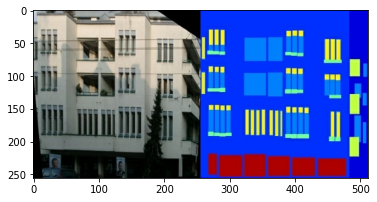

In [6]:
plt.figure()
plt.imshow(sample_image)

## 2.1 Splitting the images into two: facade and architecture labels

In [7]:
def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

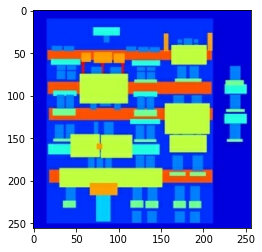

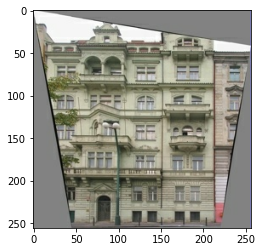

In [8]:
inp, re = load(str(PATH / 'train/100.jpg'))
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(inp / 255.0)
plt.figure()
plt.imshow(re / 255.0)

## 3. Preprocessing images

To several operations will be conducted on the training images, namely
1. Resizing each 256 x 256 image to 286 x 286.
2. Randomly crop it back to 256 x 256.
3. Randomly flip the image horizontally i.e. left to right (random mirroring).
4. Normalize the images to the [-1, 1] range.

In [9]:
# The facade training set consist of 400 images
BUFFER_SIZE = 400
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [10]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [11]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [12]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [13]:
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

2022-05-28 07:40:04.487262: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


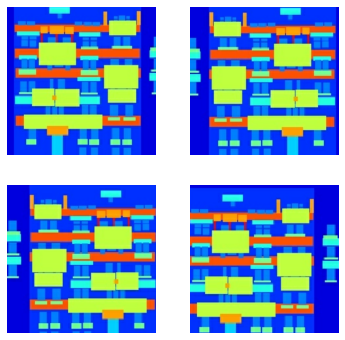

In [14]:
plt.figure(figsize=(6, 6))
for i in range(4):
  rj_inp, rj_re = random_jitter(inp, re)
  plt.subplot(2, 2, i + 1)
  plt.imshow(rj_inp / 255.0)
  plt.axis('off')
plt.show()

## 4. Defining helper functions

In [15]:
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [16]:
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

## 5. Building input pipeline

In [17]:
train_dataset = tf.data.Dataset.list_files(str(PATH / 'train/*.jpg'))
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [18]:
try:
  test_dataset = tf.data.Dataset.list_files(str(PATH / 'test/*.jpg'))
except tf.errors.InvalidArgumentError:
  test_dataset = tf.data.Dataset.list_files(str(PATH / 'val/*.jpg'))
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

## 6. Defining the generator

In [19]:
OUTPUT_CHANNELS = 3


In [20]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [21]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

(1, 128, 128, 3)


In [22]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [23]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)



(1, 256, 256, 3)


In [24]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

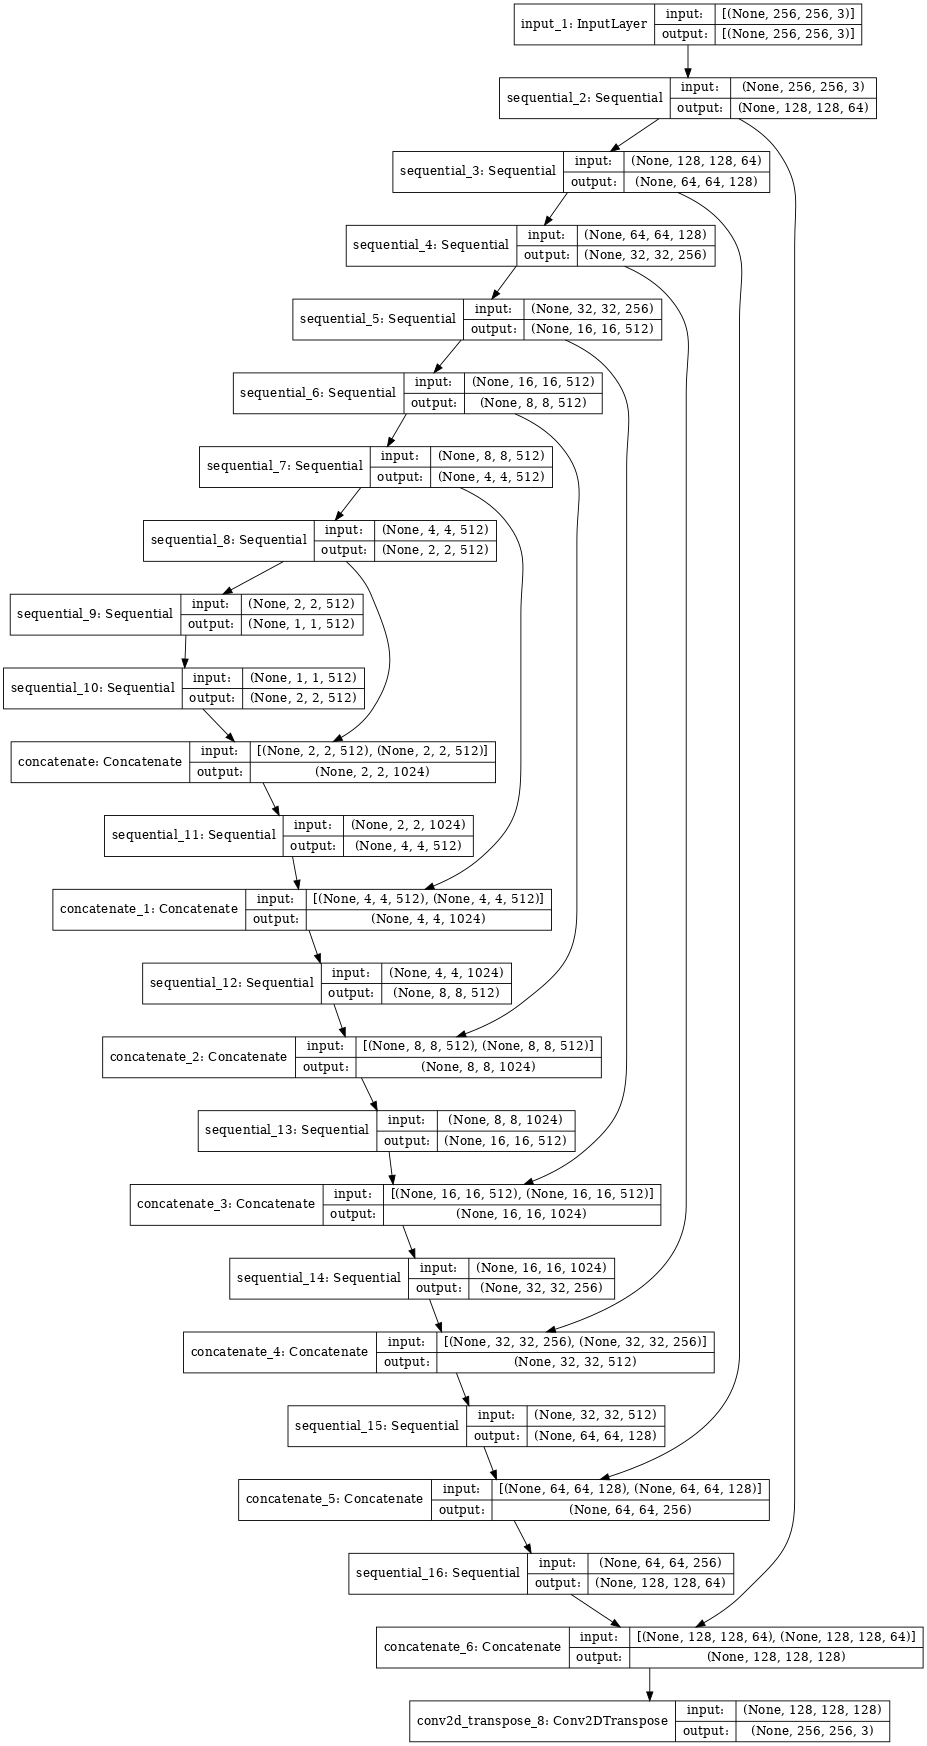

In [25]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

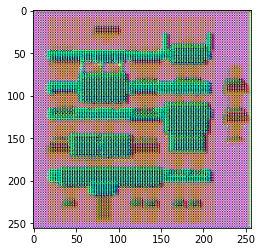

In [26]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

## 6.2 Defining Generator Loss

In [27]:
LAMBDA = 100

In [28]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [29]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

## 7. Defining Discriminator

In [30]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

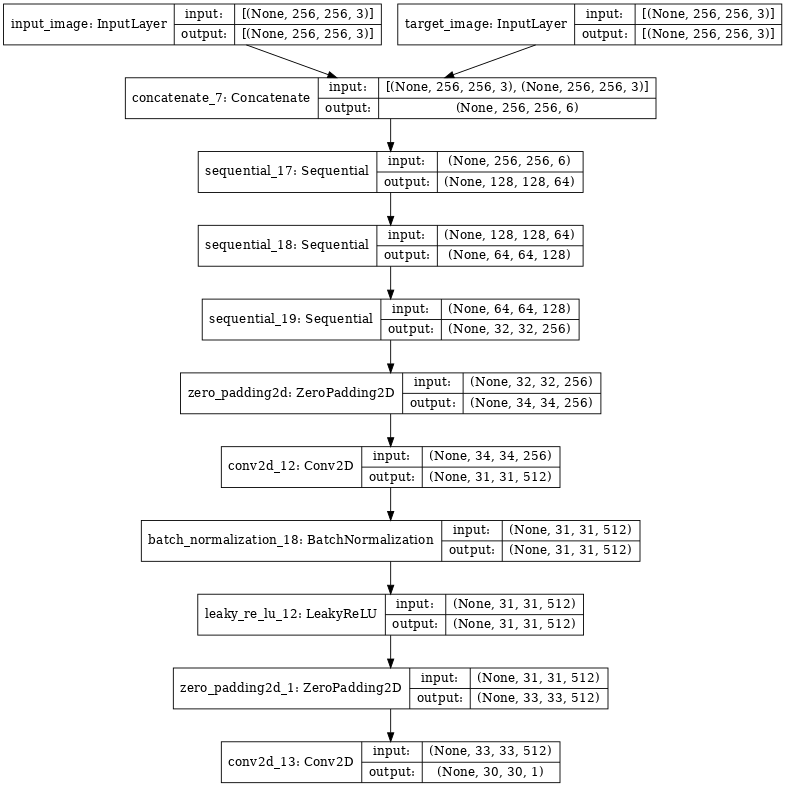

In [31]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

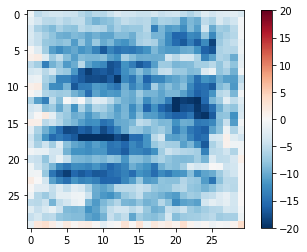

In [32]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

## 7.2 Defining Discriminator Loss

In [33]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

## 8. Defining Optimizers and Check-Point Saver

In [34]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [35]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 9. Generating Images

In [36]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

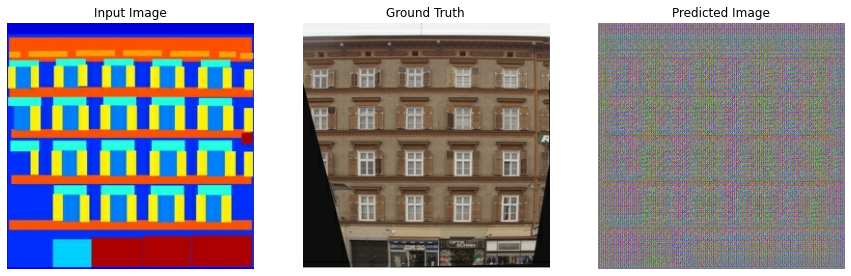

In [37]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

## 10. Training

In [38]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [39]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [40]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

In [41]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

Time taken for 1000 steps: 1240.16 sec



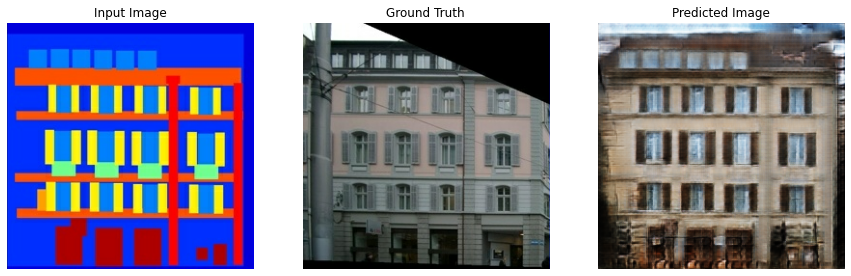

Step: 35k


.

.

.

.

.

.

.

.

.

.

In [42]:
fit(train_dataset, test_dataset, steps=40000)


In [ ]:
tensorboard dev upload --logdir {log_dir}


In [ ]:
display.IFrame(
    src="https://tensorboard.dev/experiment/lZ0C6FONROaUMfjYkVyJqw",
    width="100%",
    height="1000px")

# 11. Restoring latest checkpoint

In [ ]:
ls {checkpoint_dir}

In [ ]:
# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## 12. Generating images using test set